# Day 19

In [184]:
from scipy.stats import binom_test

## 이항검정

In [185]:
num_a = 50
num_b = 500

accept_a = 28
accept_b = 252

theta_0 = 0.5

theta_a = accept_a/num_a
tehta_b = accept_b/num_b

In [186]:
binom_test(accept_a,num_a)

0.47988766169832769

In [187]:
binom_test(32,50)

0.064908647072272188

In [188]:
scipy.stats.binom_test(accept_a,num_a, p=0.56)

1.0

In [189]:
scipy.stats.binom_test(252, 500)

0.89329024378241417

In [190]:
scipy.stats.binom_test(270,500)

0.081032349609206439

## 단일표본 t-검정

In [191]:
import numpy as np
import pandas as pd

In [276]:
score = {}
for i in range(10000):
    mu = 175
    sigma = 3
    np.random.seed(i)
    kor = sigma * np.random.randn(20) + mu
    china = sigma * np.random.randn(10) + mu
    score[i] = 10 * ((kor.mean()-175)**2 + (china.mean()-175)**2) + ((kor.std()-sigma)**2 + (china.std()-sigma)**2)

In [277]:
min(score, key=score.get)

2938

In [279]:
score[2938]

0.052496603385677403

In [193]:
x1 = scipy.stats.norm(mu, sigma).rvs()
x2 = scipy.stats.norm(mu, sigma).rvs()

In [241]:
from scipy.stats import norm

mu = 175
std = 3
n=20
np.random.seed(0)
rv = norm(mu, std)
data1 = rv.rvs(n)
data1.mean()
for i in range(1, 100000):
    for j in range(0,20):
        data1[j] -=0.01
        if data1.mean() <= 175:
            break
    if data1.mean() <= 175:
        break
data1

kor = data1

mu = 175
std = 3
n=10
np.random.seed(0)
rv = norm(mu, std)
data2 = rv.rvs(n)
data2.mean()
for i in range(1, 100000):
    for j in range(0,n):
        data2[j] -=0.01
        if data2.mean() <= 175:
            break
    if data2.mean() <= 175:
        break
data2

china = data2

In [242]:
kor

array([ 178.58215704,  174.49047163,  176.22621395,  180.0126796 ,
        178.89267397,  170.35816636,  176.14026525,  172.83592838,
        172.98034344,  174.52179551,  173.72213071,  177.65282052,
        175.57311318,  173.65502505,  174.6215897 ,  174.29102298,
        177.77223722,  172.68452521,  174.2392031 ,  170.73771278])

In [243]:
china

array([ 178.07215704,  173.98047163,  175.71621395,  179.5026796 ,
        178.38267397,  169.85816636,  175.64026525,  172.33592838,
        172.48034344,  174.02179551])

In [244]:
china2 = china - 2.4
china2

array([ 175.67215704,  171.58047163,  173.31621395,  177.1026796 ,
        175.98267397,  167.45816636,  173.24026525,  169.93592838,
        170.08034344,  171.62179551])

In [245]:
scipy.stats.ttest_ind(kor, china2, equal_var=False)

Ttest_indResult(statistic=2.1259703568671759, pvalue=0.04962768969627155)

# 베타 분포

베타 분포(Beta  distribution)는 다른 확률 분포와 달리 자연계에 존재하는 데이터의 분포를 묘사하기 보다는 베이지안 추정의 결과를 묘사하기위한 목적으로 주로 사용된다. 베이지안 추정(Bayesian estimation)은 추정하고자 하는 모수의 값을 하나의 숫자로 나타내는 것이 아니라 분포로 묘사한다.

베타 분포의 확률 밀도 함수는 $a$와 $b$라는 두 개의 모수(parameter)를 가지며 수학적으로 다음과 같이 정의된다. 

$$
\begin{align}
\text{Beta}(x;a,b) 
& = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} 
\end{align}
$$

이 식에서 
$$
\Gamma(a) = \int_0^\infty  x^{a-1} e^{-x}\, dx\\
0 \leq x \leq 1\\
a, b > 0
$$


베타 분포의 확률 밀도 함수는 그림에서 볼 수 있듯이 0부터 1까지만의 값을 가진다. 이러한 함수를 finite support를 가진다고 한다.

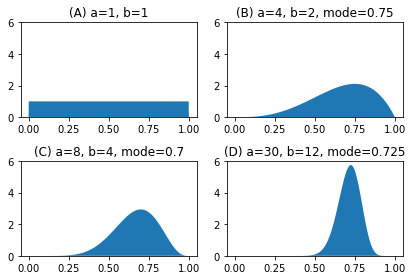

In [282]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import beta

xx = np.linspace(0, 1, 1000)
plt.subplot(221)
plt.fill(xx, scipy.stats.beta(1.0001, 1.0001).pdf(xx)); plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill(xx, scipy.stats.beta(4, 2).pdf(xx)); plt.ylim(0, 6)
plt.title("(B) a=4, b=2, mode={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill(xx, scipy.stats.beta(8, 4).pdf(xx)); plt.ylim(0, 6)
plt.title("(C) a=8, b=4, mode={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill(xx, scipy.stats.beta(30, 12).pdf(xx)); plt.ylim(0, 6)
plt.title("(D) a=30, b=12, mode={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

* (A): 추정할 수 없다. (정보가 없음)
* (B): 모수값이 0.75일 가능성이 가장 크다. (정확도 낮음)
* (C): 모수값이 0.70일 가능성이 가장 크다. (정확도 중간)
* (D): 모수값이 0.725일 가능성이 가장 크다. (정확도 높음)

베타 분포의 기댓값, 최빈값, 분산은 각각 다음과 같다.


* 기댓값

$$E[x] = \dfrac{a}{a+b}$$


* 최빈값
$$\dfrac{a - 1}{a+b - 2}$$


* 분산
$$\text{Var}[x] = \dfrac{ab}{(a+b)^2(a+b+1)}$$


**베타에 대해서는 pdf, 각 모멘트를 외우도록 한다.**

베타함수는 Bayesian Inference에서 유용하게 사용된다.

# 감마 분포

감마 분포(Gamma distribution)도 베타 분포(Beta distribution)처럼 모수의 베이지안 추정에 사용된다. 다만 베타 분포가 0부터 1사이의 값을 가지는 모수를 베이지안 방법으로 추정하는데 사용되는 것과 달리 감마 분포는 0부터 무한대의 값을 가지는 양수 값을 추정하는데 사용된다.

[[school_notebook:70a372b9c14a4e8d9d49737f0b5a3c97]]

감마 분포의 확률 밀도 함수는 a와 b라는 두 개의 모수(parameter)를 가지며 수학적으로 다음과 같이 정의된다.

$$ \text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx} $$

이 식에서

$$ \Gamma(a) = \int_0^\infty  x^{a-1} e^{-x}\, dx $$

감마 분포의 확률 밀도 함수는 모수 $a$, $b$의 값에 따라 다음과 같은 형상을 가진다.

SciPy의 stats 서브패키지에서 제공하는 `gamma` 클래스는 모수 $b=1$로 고정되어 $a$ 값만 설정할 수 있다. $b$를 바꾸려면 $x$값 스케일과 계수를 수동으로 설정하여야 한다.

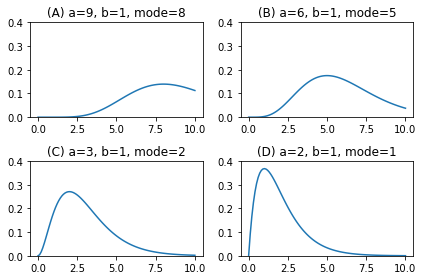

In [284]:
from scipy.stats import gamma

xx = np.linspace(0, 10, 100)
plt.subplot(221)
plt.plot(xx, scipy.stats.gamma(9).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, mode=8")
plt.subplot(222)
plt.plot(xx, scipy.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(B) a=6, b=1, mode=5")
plt.subplot(223)
plt.plot(xx, scipy.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(C) a=3, b=1, mode=2")
plt.subplot(224)
plt.plot(xx, scipy.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(D) a=2, b=1, mode=1")
plt.tight_layout()
plt.show()

위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

* (A): 모수값이 8일 가능성이 가장 크다. (정확도 아주 낮음)
* (B): 모수값이 5일 가능성이 가장 크다. (정확도 낮음)
* (C): 모수값이 2일 가능성이 가장 크다. (정확도 높음)
* (D): 모수값이 1일 가능성이 가장 크다. (정확도 아주 높음)



감마 분포의 기댓값, 최빈값, 분산은 각각 다음과 같다.



* 기댓값
$$ \text{E}[X] = \dfrac{a}{b}$$

* 최빈값
$$ \dfrac{a-1}{b}$$


* 분산
$$\text{Var}[X] = \dfrac{a}{b^2}$$


# 카테고리 분포

카테고리 분포(Categorical distribution)는 베르누이 분포의 확장판이다. 베르누이 분포는 0 이나 1(또는 -1 이나 1)이 나오는 확률 변수의 분포였다. 카케고리 분포는 1부터 K까지의 $K$개의 정수 값 중 하나가 나오는 확률 변수의 분포이다. 따라서 주사위를 던져 나오는 눈금의 수를 확률 변수라고 한다면 이 확률 변수의 분포는 $K=6$인 카테고리 분포이다.

카테고리 분포의 모수 $\theta$ 는 베르누이 분포와 달리 다음과 같은 제약 조건을 가지는 벡터값이 된다.

$$ \theta = ( \theta_1, \cdots , \theta_K ) $$

$$ 0 \leq \theta_i \leq 1 $$

$$ \sum_{k=1}^K \theta_k = 1 $$

카테고리 분포는 원래 단일 변수 확률 분포이지만 일반적으로는 0 또는 1 값만 가지는 $K$개 베르누이 분포 벡터를 가지는 다변수 확률 분포로 가정하여 사용한다. 다만 이 경우 다변수 확률 변수의 각 원소 중 하나만 1이 될 수 있다는 제약 조건을 가진다. 

이를 수식으로 나타내면 다음과 같다. 카테고리 분포는 $\text{Cat}(x;\theta)$로 표기한다.

$$ \text{Cat}(x;\theta) = \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 $x = k $일때 $x_{j=k} = 1$ 이고 $x_{j\neq k} = 0 $ 이다.

카테고리 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = \theta_k$$

* 분산
$$\text{Var}[x_k] = \theta_k(1-\theta_k)$$

SciPy는 카테고리 분포를 위한 별도의 클래스나 명령어를 제공하지 않는다. 다만 NumPy의 random 서브패키지의 `multinomial` 명령에서 `n` 인수를 1로 설정하고 `pvals`에 모수 벡터 $\theta$를 설정하면 1부터 `len(pvals)`까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.

In [285]:
np.random.seed(0)
theta = np.array([1/6]*6)
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

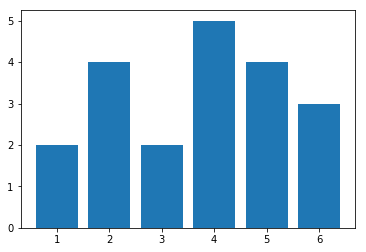

In [286]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [287]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


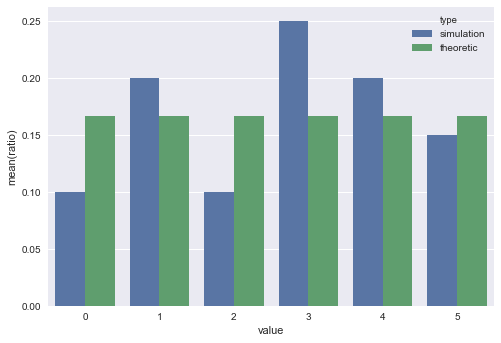

In [289]:
import seaborn as sns

sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

$\theta$를 다른 값으로 실행해보자

In [290]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

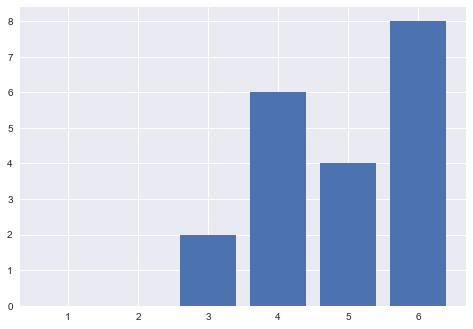

In [291]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [292]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1


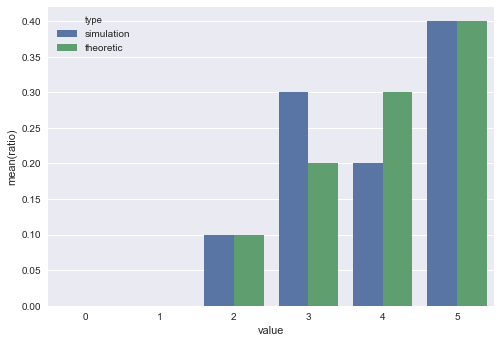

In [293]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

# 다항 분포

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포(Multinomial distribution)을 이룬다.

다항 분포는 확률 모수가 $\theta = (\theta_1, \cdots, \theta_K)$인 독립적인 카테고리 시도를 $N$번 반복해서 $k$가 각각 $x_k$번 나올 확률 즉, 벡터 $x = (x_1, \cdots, x_K)$가 나올 확률 분포를 말한다. $\text{Mu}(x;N,\theta) $와 같이 표기하며 다음과 같은 수식을 따른다.

$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 
$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

다항 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = N\theta_k$$

* 분산
$$\text{Var}[x_k] = N\theta_k(1-\theta_k)$$

SciPy는 다항 분포를 위한 별도의 클래스나 명령어를 제공하지 않고 NumPy의 random 서브패키지에서 다항 분포 샘플 생성을 하는  `multinomial` 명령어를 지원한다.

`n` 인수는 시행 횟수 $N$을 설정하고 `pvals`에 모수 벡터 $\theta$를 설정한다.

In [304]:
np.random.seed(0)
N = 30
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(N, theta, size=100)
X[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

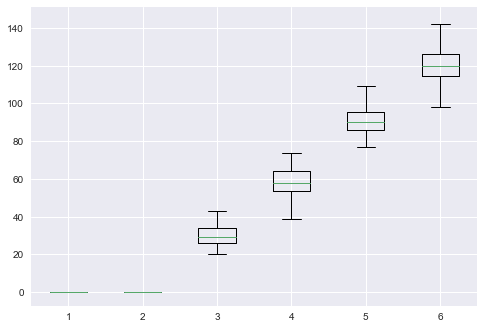

In [300]:
plt.boxplot(X)
plt.show()

In [296]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.head()

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


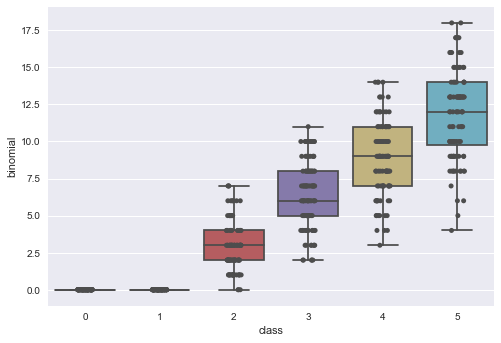

In [297]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

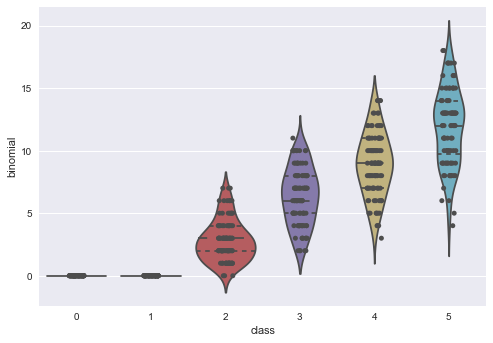

In [298]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

# 디리클레 분포

디리클레 분포(Dirichlet distribution)는 베타 분포의 확장판이라고 할 수 있다. 베타 분포는 0과 1사이의 값을 가지는 단일(univariate) 확률 변수의 베이지안 모형에 사용되고 디리클레 분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률 변수의 베이지안 모형에 사용된다. 다만 디리클레 분포틑 다변수 확률 변수들의 합이 1이되어야 한다는 제한 조건을 가진다.

즉 $K=3$인 디리클레 분포를 따르는 확률 변수는 다음과 같은 값들을 샘플로 가질 수 있다.

$$(1, 0, 0)$$
$$(0.5, 0.5, 0)$$
$$(0.2, 0.3, 0.5)$$

디리클레 분포의 확률 밀도 함수는 다음과 같다.

$$ f(x_1, x_2, \cdots, x_K; \alpha, \beta) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{i=1}^K x_i^{\alpha_i - 1} $$
여기에서 
$$ \mathrm{B}(\boldsymbol\alpha) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)} {\Gamma\bigl(\sum_{i=1}^K \alpha_i\bigr)} $$
이고 다음과 같은 제한 조건이 있다.
$$  \sum_{i=1}^{K} x_i = 1 $$

이 식에서 $\boldsymbol\alpha =  (\alpha_1, \alpha_2, \ldots, \alpha_K)$는 디리클레 분포의 모수 벡터이다.

## 베타 분포와 디리클레 분포의 관계

베타 분포는 $K=2$ 인 디리클레 분포라고 볼 수 있다.

즉 $x_1 = x$, $x_2 = 1 - x$, $\alpha_1 = a$, $\alpha_2 = b$ 로 하면 

$$ 
\begin{eqnarray}
\text{Beta}(x;a,b) 
&=& \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} \\
&=& \frac{\Gamma(\alpha_1+\alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)}\,  x_1^{\alpha_1 - 1} x_2^{\alpha_2 - 1} \\
&=& \frac{1}{\mathrm{B}(\alpha_1, \alpha_2)} \prod_{i=1}^2 x_i^{\alpha_i - 1}
\end{eqnarray}
$$



## 디리클레 분포의 모멘트 특성

디리클레 분포의 기댓값, 모드, 분산은 다음과 같다.

* 기댓값
$$E[x_k] = \dfrac{\alpha_k}{\alpha}$$
여기에서
$$\alpha=\sum\alpha_k$$

* 모드
$$ \dfrac{\alpha_k - 1}{\alpha - K}$$

* 분산
$$\text{Var}[x_k] =\dfrac{\alpha_k(\alpha - \alpha_k)}{\alpha^2(\alpha + 1)}$$

기댓값 공식을 보면 모수인 $\boldsymbol\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_K)$는 $(x_1, x_2, \ldots, x_K$ 중 어느 수가 더 크게 나올 가능성이 높은지를 결정하는 형상 인자(shape factor)임을 알 수 있다. 모든 $\alpha_i$값이 동일하면 모든 $x_i$의 분포가 같아진다. 

또한 분산 공식을 보면 $\boldsymbol\alpha$의 절대값이 클수록 분산이 작아진다. 즉, 어떤 특정한 값이 나올 가능성이 높아진다.


# 선형대수와 해석기하

### 중요 개념

* 벡터 화살표
* 벡터의 길이, 단위 벡터
* 벡터의 합과 차
* 벡터의 분해와 성분
* 두 벡터 사이의 각도과 직교
* 벡터의 투영
* 직선의 방정식
* 직선과 점의 거리
* 벡터의 선형 종속과 선형 독립
* 기저 벡터
* 좌표와 좌표 변환

## 벡터의 기하학적 의미

$N$차원 벡터(vector) $a$는 $N$차원의 공간상에서 

* 벡터 $a$의 값으로 표시되는 점(point) 또는
* 원점과 벡터 $a$의 값으로 표시되는 점을 연결한 화살표(arrow)로 간주할 수 있다. 

예를 들어 2차원 벡터 $a = [a_1 \;\; a_2]^T$ 는 2차원 상의 공간에서 $x$좌표가 $a_1$, $y$좌표가 $a_2$인 점, 또는 원점에서 이 점을 가리키는 화살표가 된다. 

$$ a = \begin{bmatrix}1 \\ 2 \end{bmatrix} $$